强化学习中的环境一般就是指一个MDP,如果要用强化学习去解决一个实际问题，第一步要做的事情就是把这个实际问题抽象为一个马尔可夫决策过程，也就是明确马尔可夫决策过程的各个组成要素

3.2 马尔可夫过程

3.2.1 随机过程


随机过程 (stochastic process) 是概率论的“动力学”部分。概率论的研究对象是静态的
随机现象，而随机过程的研究对象是随时间演变的随机现象(例如天气随时间的变化、城市交通随时间的变化)。在随机过程中，随机现象在某时刻$t$的取值是一个向量随机变量，用$S_t$表示，所有可能的状态组成状态集合$S$。随机现象便是状态的变化过程。在某时刻$t$的状态$S_t$通常取决于$t$时刻之前的状态。我们将已知历史信息$(S_1,\ldots,S_t)$时下一个时刻状态为$S_t+1$的概率表示成$P(S_t+1|S_1,\ldots,S_t)$。

3.2.2马尔可夫性质

当且仅当某时刻的状态只取决于上一时刻的状态时，一个随机过程被称为具有马尔可夫性质 (Markov property),用公式表示为$P(S_{t+1}|S_t)=P(S_{t+1}|S_1,\ldots,S_t)$。也就是说，当前状态是未来的充分统计量，即下一个状态只取决于当前状态，而不会受到过去状态的影响。需要明确的是，具有马尔可夫性并不代表这个随机过程就和历史完全没有关系。因为虽然$t+1$时刻的状态只与$t$时刻的状态有关，但是$t$时刻的状态其实包含了$t-1$时刻的状态的信息，通过这种链式的关系，历史的信息被传递到了现在。马尔可夫性可以大大简化运算，因为只要当前状态可知，所有的历史信息都不再需要了，利用当前状态信息就可以决定未来。

3.2.3 马尔可夫过程

马尔可夫过程 (Markov process) 指具有马尔可夫性质的随机过程，也被称为马尔可夫链(Markov chain)。我们通常用元组$\langle\mathcal{S},\mathcal{P}\rangle$描述一个马尔可夫过程，其中$S$是有限数量的状态集合，$\mathcal{P}$是状态转移矩阵(state transition matrix)。假设一共有$n$个状态， 此时$\mathcal{S}=\{s_1,s_2,\ldots,s_n\}$。状态转移矩阵$\mathcal{P}$定义了所有状态对之间的转移概率，即

$$\mathcal{P}=\begin{bmatrix}P(s_1|s_1)&\cdots&P(s_n|s_1)\\\vdots&\ddots&\vdots\\P(s_1|s_n)&\cdots&P(s_n|s_n)\end{bmatrix}$$

矩阵$\mathcal{P}$中第$i$行第$j$列元素$P(s_j|s_i)=P(S_{t+1}=s_j|S_t=s_i)$表示从状态$s_i$转移到状

态$s_j$的概率，我们称$P(s^{\prime}|s)$为状态转移函数。从某个状态出发，到达其他状态的概率

和必须为 1,即状态转移矩阵$\mathcal{P}$的每一行的和为 1。

3.3 马尔可夫奖励过程

在马尔可夫过程的基础上加入奖励函数 $r$和折扣因子$\gamma$,就可以得到马尔可夫奖励过程(Markov reward process)。一个马尔可夫奖励过程由$\langle\mathcal{S},\mathcal{P},r,\gamma\rangle$构成，各个组成元

素的含义如下所示。

$\cdot\mathcal{S}$是有限状态的集合。

$\cdot\mathcal{P}$是状态转移矩阵。

·$r$是奖励函数，某个状态$s$的奖励 $r(s)$指转移到该状态时可以获得奖励的期望。

·$\gamma$是折扣因子(discount factor),$\gamma$的取值范围为[0,1)。引入折扣因子的理由为

远期利益具有一定不确定性，有时我们更希望能够尽快获得一些奖励，所以我们

需要对远期利益打一些折扣。接近 1 的γ更关注长期的累计奖励，接近 0 的γ更考

虑短期奖励。


3.3.1 回报

在一个马尔可夫奖励过程中，从第$t$时刻状态$S_t$开始，直到终止状态时，所有奖励的衰减之和称为回报$G_t$ (Return),公式如下：

$$G_t=R_t+\gamma R_{t+1}+\gamma^2R_{t+2}+\cdots=\sum_{k=0}^\infty\gamma^kR_{t+k}$$

其中，$R_i$表示在时刻$t$获得的奖励。某个状态s的奖励可以为负数,表示我们不希望进入这个状态.

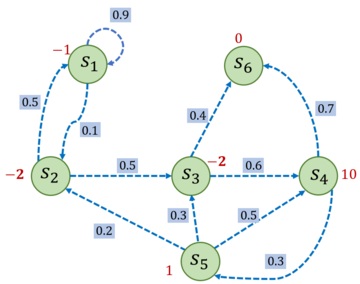

下面,我们用代码展示上图的马尔可夫奖励过程

In [8]:
import numpy as np
np.random.seed(0)

# 定义状态转移概率矩阵P
P = [
    [0.9, 0.1, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.0, 0.4],
    [0.0, 0.0, 0.0, 0.0, 0.3, 0.7],
    [0.0, 0.2, 0.3, 0.5, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
]
P = np.array(P)

rewards = [-1, -2, -2, 10, 1, 0]  # 定义奖励函数
gamma = 0.5  # 定义折扣因子


# 给定一条序列,计算从某个索引（起始状态）开始到序列最后（终止状态）得到的回报
def compute_return(start_index, chain, gamma):
    G = 0
    for i in reversed(range(start_index, len(chain))):
        G = gamma * G + rewards[chain[i] - 1]
    return G


# 一个状态序列,s1-s2-s3-s6
chain = [1, 2, 3, 6]
start_index = 0
G = compute_return(start_index, chain, gamma)
print("根据本序列计算得到回报为：%s。" % G)

根据本序列计算得到回报为：-2.5。


3.3.2 价值函数

在马尔可夫奖励过程中，一个状态的期望回报(即从这个状态出发的未来累积奖励的期望)被称为这个状态的价值(value)。所有状态的价值就组成了价值函数 (value function),价值函数的输入为某个状态，输出为这个状态的价值。我们将价值函数写成$V(s)=\mathbb{E}[G_t|S_t=s]$,展开为

\begin{aligned}V(s)&=\mathbb{E}[G_t|S_t=s]\\&=\mathbb{E}[R_t+\gamma R_{t+1}+\gamma^2R_{t+2}+\ldots|S_t=s]\\&=\mathbb{E}[R_t+\gamma(R_{t+1}+\gamma R_{t+2}+\ldots)|S_t=s]\\&=\mathbb{E}[R_t+\gamma G_{t+1}|S_t=s]\\&=\mathbb{E}[R_t+\gamma V(S_{t+1})|S_t=s]\end{aligned}

在上式的最后一个等号中，一方面，即时奖励的期望正是奖励函数的输出。
即$\mathbb{E}[R_t|S_t=s]=r(s)$ ;另一方面，等式中剩余部分
$\mathbb{E}[\gamma V(S_{t+1})|S_t=s]$可以根据从状态$s$出发的转移概率得到，即可以得到

$$V(s)=r(s)+\gamma\sum_{s'\in S}p(s'|s)V(s')$$

(详见 <https://juejin.cn/post/7435177344862928896>)

上式就是马尔可夫奖励过程中非常有名的贝尔曼方程 (Bellman equation),对每一个状态都成立。若一个马尔可夫奖励过程一共有$n$个状态，即$\mathcal{S}=\{s_1,s_2,\ldots,s_n\}$,我们将所有状态的价值表示成一个列向量   
$\mathcal{V}=[V(s_1),V(s_2),\ldots,V(s_n)]^T$,同理，将奖励函数写成一个列向量 $\mathcal{R}=[r(s_1),r(s_2),\ldots,r(s_n)]^T$。于是我们可以将贝尔曼方程写成矩阵的形式：

$$\mathcal{V}=\mathcal{R}+\gamma\mathcal{P}\mathcal{V}$$

\begin{bmatrix}V(s_1)\\V(s_2)\\...\\V(s_n)\end{bmatrix}=\begin{bmatrix}r(s_1)\\r(s_2)\\...\\r(s_n)\end{bmatrix}+\gamma\begin{bmatrix}P(s_1|s_1)&p(s_2|s_1)&...&P(s_n|s_1)\\P(s_1|s_2)&P(s_2|s_2)&...&P(s_n|s_2)\\...\\P(s_1|s_n)&P(s_2|s_n)&...&P(s_n|s_n)\end{bmatrix}\begin{bmatrix}V(s_1)\\V(s_2)\\...\\V(s_n)\end{bmatrix}

解析解为

\begin{aligned}\mathrm{V}&=\mathcal{R}+\gamma\mathcal{PV}\\(I-\gamma\mathcal{P})\mathcal{V}&=\mathcal{R}\\\mathrm{V}&=(I-\gamma\mathcal{P})^{-1}\mathcal{R}\end{aligned}

矩阵运算求解的复杂度为 $O(n^3)$ ,n为状态个数,求解较大规模的马尔可夫奖励过程中的价值函数时，可以使用动态规划（dynamic programming）算法、蒙特卡洛方法（Monte-Carlo method）和时序差分（temporal difference）

下面的函数实现了对矩阵求逆得出解析解

In [9]:
def compute(P, rewards, gamma, states_num):
    rewards = np.array(rewards).reshape((-1, 1))  # 固定1列,行数自动计算
    # 下面是公式代入部分
    value = np.dot(np.linalg.inv(np.eye(states_num, states_num) - gamma * P), rewards)

    return value

V = compute(P, rewards, gamma, 6)
print("MRP中每个状态价值分别为\n", V)
# 可代入贝尔曼方程进行验证

MRP中每个状态价值分别为
 [[-2.01950168]
 [-2.21451846]
 [ 1.16142785]
 [10.53809283]
 [ 3.58728554]
 [ 0.        ]]


3.2 节和 3.3 节讨论到的马尔可夫过程和马尔可夫奖励过程都是自发改变的随机过程；而如果有一个外界的“刺激”来共同改变这个随机过程，就有了马尔可夫决策过程 (Markov decision process, MDP)。我们将这个来自外界的刺激称为智能体 (agent)的动作，在马尔可夫奖励过程 (MRP)的基础上加入动作，就得到了马尔可夫决策过程(MDP)。马尔可夫决策过程由元组
$\langle\mathcal{S},\mathcal{A},P,r,\gamma\rangle$构成，其中：

·$\mathcal{S}$是状态的集合 ;

 $\cdot\mathcal{A}$是动作的集合 ;
 
  $\cdot\gamma$是折扣因子 ;
$\cdot r(s,a)$是奖励函数，此时奖励可以同时取决于状态$s$和动作$a$,在奖励函
数只取决于状态$s$时，则退化为$r(s)$ ;

$\cdot P(s^{\prime}|s,a)$是状态转移函数，表示在状态$s$执行动作$a$之后到达状态$s^\prime$的
概率。

我们发现 MDP 与 MRP 非常相像，主要区别为 MDP 中的状态转移函数和奖励函数都比 MRP 多了动作$a$作为自变量。注意，在上面 MDP 的定义中，我们不再便用类似 MRP 定义中的状态转移矩阵方式，而是直接表示成了状态转移函数。这样做一是因为此时状态转移与动作也有关，变成了一个三维数组，而不再是一个矩阵(二维数组);二是因为状态转移函数更具有一般意义，例如，如果状态集合不是有限的，就无法用数组表示，但仍然可以用状态转移函数表示。我们在之后的课程学习中会遇到连续状态的 MDP 环境，那时状态集合都不是有限的。现在我们主要关注于离散状态的 MDP 环境，此时状态集合是有限的。
不同于马尔可夫奖励过程，在马尔可夫决策过程中，通常存在一个智能体来执行动作。例如，一艘小船在大海中随着水流自由飘荡的过程就是一个马尔可夫奖励过程，它如果凭借运气漂到了一个目的地，就能获得比较大的奖励；如果有个水手在控制着这条船往哪个方向前进，就可以主动选择前往目的地获得比较大的奖励。马尔可夫决策过程是一个与时间相关的不断进行的过程，在智能体和环境 MDP 之间存在一个不断交互的过程。一般而言，它们之间的交互是如图 3-3 循环过程 :智能体根据当前状态$S_t$选择动作$A_t;$对于状态$S_t$和动作$A_t$,MDP 根据奖励函数和状态转移函数得到$S_{t+1}$和$R_t$并反馈给智能体。智能体的目标是最大化得到的累计奖励。智能体根据当前状态从动作的集合$\mathcal{A}$中选择一个动作的函数，被称为策略。

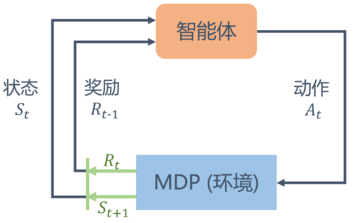


3.4.1 策略

智能体的策略(Policy)通常用字母$\pi$表示。策略
$\pi(a|s)=P(A_t=a|S_t=s)$是一个函数，表示在输入状态$s$情况下采取动作$a$的概率。当一个策略是确定性策略(deterministic policy) 时，它在每个状态时只输出一个确定性的动作，即只有该动作的概率为 1,其他动作的概率为 0;当一个策略是随机性策略(stochastic policy) 时，它在每个状态时输出的是关于动作的概率分布，然后根据该分布进行采样就可以得到一个动作。在 MDP 中，由于马尔可夫性质的存在，策略只需要与当前状态有关，不需要考虑历史状态。回顾一下在 MRP 中的价值函数，在 MDP 中也同样可以定义类似的价值函数。但此时的价值函数与策略有关，这意为着对于两个不同的策略来说，它们在同一个状态下的价值也很可能是不同的。这很好理解，因为不同的策略会采取不同的动作，从而之后会遇到不同的状态，以及获得不同的奖励，所以它们的累积奖励的期望也就不同，即状态价值不同。

3.4.2状态价值函数

我们用$V^\pi(s)$表示在 MDP 中基于策略$\pi$的状态价值函数(state-value function),定义为从状态$s$出发遵循策略$\pi$能获得的期望回报，数学表达为 :

$$V^\pi(s)=\mathbb{E}_\pi[G_t|S_t=s]$$

3.4.3动作价值函数

不同于 MRP,在 MDP 中，由于动作的存在，我们额外定义一个动作价值函数(action-value function)。我们用$Q^\pi(s,a)$表示在 MDP 遵循策略$\pi$时，对当前状态$s$执行动作$a$得到的期望回报 :

$$Q^\pi(s,a)=\mathbb{E}_\pi[G_t|S_t=s,A_t=a]$$

状态价值函数和动作价值函数之间的关系：在使用策略$\pi$中，状态$s$的价值等于在该状态下基于策略$\pi$采取所有动作的概率与相应的价值相乘再求和的结果：


$$V^\pi(s)=\sum_{a\in A}\pi(a|s)Q^\pi(s,a)$$

使用策略$\pi$时，状态$s$下采取动作$a$的价值等于即时奖励加上经过衰减后的所
有可能的下一个状态的状态转移概率与相应的价值的乘积 :

$$Q^\pi(s,a)=r(s,a)+\gamma\sum_{s^{\prime}\in S}P(s^{\prime}|s,a)V^\pi(s^{\prime})$$

3.4.4 贝尔曼期望方程

两个价值函数分别具有对应的贝尔曼期望方程,表示为

\begin{aligned}V^{\pi}(s)&=\mathbb{E}_\pi[R_t+\gamma V^\pi(S_{t+1})|S_t=s]\\&=\sum_{a\in A}\pi(a|s)\left(r(s,a)+\gamma\sum_{s^{\prime}\in S}p(s^{\prime}|s,a)V^\pi(s^{\prime})\right)\\Q^\pi(s,a)&=\mathbb{E}_\pi[R_t+\gamma Q^\pi(S_{t+1},A_{t+1})|S_t=s,A_t=a]\\&=r(s,a)+\gamma\sum_{s^{\prime}\in S}p(s^{\prime}|s,a)\sum_{a^{\prime}\in A}\pi(a^{\prime}|s^{\prime})Q^\pi(s^{\prime},a^{\prime})\end{aligned}

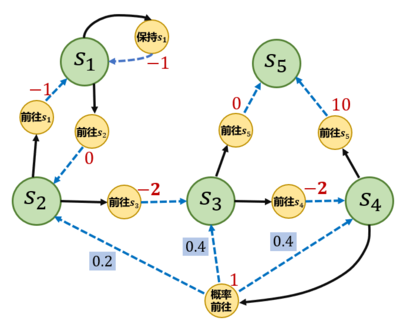

上面是一个MDP的示意图,与MRP不同的是,奖励既与动作a绑定,又与状态s绑定

这张图的实现如下:

In [10]:
S = ["s1", "s2", "s3", "s4", "s5"]  # 状态集合
A = ["保持s1", "前往s1", "前往s2", "前往s3", "前往s4", "前往s5", "概率前往"]  # 动作集合
# 状态转移函数
P = {
    "s1-保持s1-s1": 1.0,
    "s1-前往s2-s2": 1.0,
    "s2-前往s1-s1": 1.0,
    "s2-前往s3-s3": 1.0,
    "s3-前往s4-s4": 1.0,
    "s3-前往s5-s5": 1.0,
    "s4-前往s5-s5": 1.0,
    "s4-概率前往-s2": 0.2,
    "s4-概率前往-s3": 0.4,
    "s4-概率前往-s4": 0.4,
}
# 奖励函数
R = {
    "s1-保持s1": -1,
    "s1-前往s2": 0,
    "s2-前往s1": -1,
    "s2-前往s3": -2,
    "s3-前往s4": -2,
    "s3-前往s5": 0,
    "s4-前往s5": 10,
    "s4-概率前往": 1,
}
gamma = 0.5  # 折扣因子
MDP = (S, A, P, R, gamma)

# 策略1,随机策略
Pi_1 = {
    "s1-保持s1": 0.5,
    "s1-前往s2": 0.5,
    "s2-前往s1": 0.5,
    "s2-前往s3": 0.5,
    "s3-前往s4": 0.5,
    "s3-前往s5": 0.5,
    "s4-前往s5": 0.5,
    "s4-概率前往": 0.5,
}
# 策略2
Pi_2 = {
    "s1-保持s1": 0.6,
    "s1-前往s2": 0.4,
    "s2-前往s1": 0.3,
    "s2-前往s3": 0.7,
    "s3-前往s4": 0.5,
    "s3-前往s5": 0.5,
    "s4-前往s5": 0.1,
    "s4-概率前往": 0.9,
}


# 把输入的两个字符串通过“-”连接,便于使用上述定义的P、R变量
def join(str1, str2):
    return str1 + '-' + str2

由条件概率的性质,我们可以知道,通过对MDP进行边缘化(marginalization),我们可以把MDP转化为MRP

具体来说,给定一个MDP和一个策略 $\pi$ ,我们可以通过如下公式转化:

\begin{gathered}r^{\prime}(s)=\sum_{a\in\mathcal{A}}\pi(a|s)r(s,a)\\ P^{\prime}(s^{\prime}|s)=\sum_{a\in\mathcal{A}}\pi(a|s)P(s^{\prime}|s,a)\end{gathered}

In [11]:
gamma = 0.5
# 转化后的MRP的状态转移矩阵(使用随机策略)
P_from_mdp_to_mrp = [
    [0.5, 0.5, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.5, 0.5],
    [0.0, 0.1, 0.2, 0.2, 0.5],
    [0.0, 0.0, 0.0, 0.0, 1.0],
]
P_from_mdp_to_mrp = np.array(P_from_mdp_to_mrp)
R_from_mdp_to_mrp = [-0.5, -1.5, -1.0, 5.5, 0]

V = compute(P_from_mdp_to_mrp, R_from_mdp_to_mrp, gamma, 5)
print("MDP中每个状态价值分别为\n", V)

MDP中每个状态价值分别为
 [[-1.22555411]
 [-1.67666232]
 [ 0.51890482]
 [ 6.0756193 ]
 [ 0.        ]]


已知状态价值函数V,可以求动作价值函数Q(见3.4.3)

3.5 蒙特卡洛法

$$V^{\pi}(s) = \mathbb{E}_{\pi}[G_t | S_t = s] \approx \frac{1}{N} \sum_{i=1}^{N} G_t^{(i)}$$
在一条序列中，可能没有出现过这个状态，可能只出现过一次这个状态，也可能出现过很多次这个状态。我们介绍的蒙特卡洛价值估计方法会在该状态每一次出现时计算它的回报。还有一种选择是一条序列只计算一次回报，也就是这条序列第一次出现该状态时计算后面的累积奖励，而后面再次出现该状态时，该状态就被忽略了。假设我们现在用策略π从状态s开始采样序列，据此来计算状态价值。我们为每一个状态维护一个计数器和总回报，计算状态价值的具体过程如下所示。
(1) 使用策略π采样若干条序列：
$$
s_0^{(i)} \xrightarrow{a_0^{(i)}} r_0^{(i)}, s_1^{(i)} \xrightarrow{a_1^{(i)}} r_1^{(i)}, s_2^{(i)} \xrightarrow{a_2^{(i)}} \ldots \xrightarrow{a_{T-1}^{(i)}} r_{T-1}^{(i)}, s_T^{(i)}$$
(2) 对每一条序列中的每一时间步t的状态s进行以下操作：
- 更新状态s的计数器 $N(s) \leftarrow N(s) + 1$;

- 更新状态s的总回报 $M(s) \leftarrow M(s) + G_t$;

(3) 每一个状态的价值被估计为回报的平均值 $V(s) = M(s) / N(s)$。

根据大数定律，当 $N(s) \to \infty$，有 $V(s) \to V^{\pi}(s)$。

计算回报的期望时，除了可以把所有的回报加起来除以次数，还有一种增量更新的方法。对于每个状态s和对应回报G，进行如下计算：

- $N(s) \leftarrow N(s) + 1$
- $V(s) \leftarrow V(s) + \frac{1}{N(s)}(G - V(s))$

这种增量式更新期望的方法已经在第2章中展示过。

In [12]:
def sample(MDP, Pi, timestep_max, number):
    ''' 采样函数,策略Pi,限制最长时间步timestep_max,总共采样序列数number '''
    S, A, P, R, gamma = MDP
    episodes = []
    for _ in range(number):
        episode = []
        timestep = 0
        s = S[np.random.randint(4)]  # 随机选择一个除s5以外的状态s作为起点
        # 当前状态为终止状态或者时间步太长时,一次采样结束
        while s != "s5" and timestep <= timestep_max:
            timestep += 1
            rand, temp = np.random.rand(), 0
            # 在状态s下根据策略选择动作
            for a_opt in A:
                temp += Pi.get(join(s, a_opt), 0)
                if temp > rand:
                    a = a_opt
                    r = R.get(join(s, a), 0)
                    break
            rand, temp = np.random.rand(), 0
            # 根据状态转移概率得到下一个状态s_next
            for s_opt in S:
                temp += P.get(join(join(s, a), s_opt), 0)
                if temp > rand:
                    s_next = s_opt
                    break
            episode.append((s, a, r, s_next))  # 把（s,a,r,s_next）元组放入序列中
            s = s_next  # s_next变成当前状态,开始接下来的循环
        episodes.append(episode)
    return episodes


# 采样5次,每个序列最长不超过20步
episodes = sample(MDP, Pi_1, 20, 5)
print('第一条序列\n', episodes[0])
print('第二条序列\n', episodes[1])
print('第五条序列\n', episodes[4])


# 对所有采样序列计算所有状态的价值
def MC(episodes, V, N, gamma):
    for episode in episodes:
        G = 0
        for i in range(len(episode) - 1, -1, -1):  #一个序列从后往前计算
            (s, a, r, s_next) = episode[i]
            G = r + gamma * G
            N[s] = N[s] + 1
            V[s] = V[s] + (G - V[s]) / N[s]


timestep_max = 20
# 采样1000次,可以自行修改
episodes = sample(MDP, Pi_1, timestep_max, 1000)
gamma = 0.5
V = {"s1": 0, "s2": 0, "s3": 0, "s4": 0, "s5": 0}
N = {"s1": 0, "s2": 0, "s3": 0, "s4": 0, "s5": 0}
MC(episodes, V, N, gamma)
print("使用蒙特卡洛方法计算MDP的状态价值为\n", V)

第一条序列
 [('s1', '前往s2', 0, 's2'), ('s2', '前往s3', -2, 's3'), ('s3', '前往s5', 0, 's5')]
第二条序列
 [('s4', '概率前往', 1, 's4'), ('s4', '前往s5', 10, 's5')]
第五条序列
 [('s2', '前往s3', -2, 's3'), ('s3', '前往s4', -2, 's4'), ('s4', '前往s5', 10, 's5')]
使用蒙特卡洛方法计算MDP的状态价值为
 {'s1': -1.228923788722258, 's2': -1.6955696284402704, 's3': 0.4823809701532294, 's4': 5.967514743019431, 's5': 0}


3.6 占用度量(没完全懂,需要再看)

3.4 节提到，不同策略的价值函数是不一样的。这是因为对于同一个 MDP,
不同策略会访问到的状态的概率分布是不同的。想象一下，图3-4 的 MDP 中现在有一个策略，它的动作执行会使得智能体尽快到达终止状态$s_{5}$,于是当智能体处于状态$s_3$时，不会采取“前往$s_4$”的动作，而只会以1 的概率采取“前住$s_{5}$”的动作，所以智能体也不会获得在$s_4$状态下采取“前往$s_{5}$”可以得到的很大的奖励 10。可想而知，根据贝尔曼方程，这个策略在状态$s_3$的概率会比较小，究其原因是因为它没法到达状态$s_{4}$。因此我们需要理解不同策略会使智能体访问到不同概率分布的状态这个事实，这会影响到策略的价值函数。
首先我们定义 MDP 的初始状态分布为$\nu_0(s)$,在有些资料中，初始状态分布会被定义进 MDP 的组成元素中。我们用$P_t^\pi(s)$表示采取策略$\pi$使得智能体在$t$时刻状态为$s$的概率，所以我们有$P_0^\pi(s)=\nu_0(s)$,然后就可以定义一个策略的状态访问分布 (state visitation distribution):

$$\nu^\pi(s)=(1-\gamma)\sum_{t=0}^\infty\gamma^tP_t^\pi(s)$$

其中，$1-\gamma$是用来使得概率加和为 1 的归一化因子。状态访问概率表示一

个策略和 MDP 交互会访问到的状态的分布。需要注意的是，理论上在计算该

分布时需要交互到无穷步之后，但实际上智能体和 MDP 的交互在一个序列中

是有限的。不过我们仍然可以用以上公式来表达状态访问概率的思想，状态

访问概率有如下性质：

$$\nu^\pi(s')=(1-\gamma)\nu_0(s')+\gamma\int P(s'|s,a)\pi(a|s)\nu^\pi(s)dsda$$

此外，我们还可以定义策略的占用度量(occupancy measure):

$$\rho^\pi(s,a)=(1-\gamma)\sum_{t=0}^\infty\gamma^tP_t^\pi(s)\pi(a|s)$$

它表示动作状态对$(s,a)$被访问到的概率。二者之间存在如下关系 :
$$\rho^\pi(s,a)=\nu^\pi(s)\pi(a|s)$$


进一步得出如下两个定理。定理 1:智能体分别以策略$\pi_{1}$和$\pi_{2}$和同一个 MDP
交互得到的占用度量$\rho^{\pi_1}$和$\rho^\mathrm{\pi_2}$满足

$$\rho^{\pi_1}=\rho^{\pi_2}\Longleftrightarrow\quad\pi_1=\pi_2$$

定理 2 :给定一合法占用度量$\rho$, 可生成该占用度量的唯一策略是
$$\pi_\rho=\frac{\rho(s,a)}{\sum_{a^{\prime}}\rho(s,a^{\prime})}$$


注意：以上提到的“合法”占用度量是指存在一个策略使智能体与 MDP 交互产
生的状态动作对被访问到的概率。
接下来我们编写代码来近似估计占用度量。这里我们采用近似估计，即设置一个较大的采样轨迹长度的最大值，然后采样很多次，用状态动作对出现的频率估计实际概率。

In [ ]:
def occupancy(episodes, s, a, timestep_max, gamma):
    ''' 计算状态动作对（s,a）出现的频率,以此来估算策略的占用度量 '''
    rho = 0
    total_times = np.zeros(timestep_max)  # 记录每个时间步t各被经历过几次
    occur_times = np.zeros(timestep_max)  # 记录(s_t,a_t)=(s,a)的次数
    for episode in episodes:
        for i in range(len(episode)):
            (s_opt, a_opt, r, s_next) = episode[i]
            total_times[i] += 1
            if s == s_opt and a == a_opt:
                occur_times[i] += 1
    for i in reversed(range(timestep_max)):
        if total_times[i]:
            rho += gamma**i * occur_times[i] / total_times[i]
    return (1 - gamma) * rho


gamma = 0.5
timestep_max = 1000

episodes_1 = sample(MDP, Pi_1, timestep_max, 1000)
episodes_2 = sample(MDP, Pi_2, timestep_max, 1000)
rho_1 = occupancy(episodes_1, "s4", "概率前往", timestep_max, gamma)
rho_2 = occupancy(episodes_2, "s4", "概率前往", timestep_max, gamma)
print(rho_1, rho_2)

# 不同策略对于同一个状态动作对的占用度量是不一样的。

0.112567796310472 0.23199480615618912


3.7 最优策略


强化学习的目标通常是找到一个策略，使得智能体从初始状态出发能获得最多的期望回报。我们首先定义策略之间的偏序关系：当且仅当对于任意的状态$s$都有$V^\pi(s)\geq V^{\pi^{\prime}}(s)$,记$\pi>\pi^{\prime}$。于是在有限状态和动作集合的 MDP 中，至少存在一个策略比其他所有策略都好或者至少存在一个策略不差于其他所有策略，这个策略就是最优策略(optimal policy)。最优策略可能有很多个，我们都将其表示为$\pi^*(s)$。
最优策略都有相同的状态价值函数，我们称之为最优状态价值函数，表示
为：

$$V^*(s)=\max_\pi V^\pi(s),\quad\forall s\in\mathcal{S}$$

同理，我们定义最优动作价值函数：

$$Q^*(s,a)=\max_\pi Q^\pi(s,a),\quad\forall s\in\mathcal{S},a\in\mathcal{A}$$

为了使$Q^\pi(s,a)$最大，我们需要在当前的状态动作对$(s,a)$之后都执行最优策略。于是我们得到了最优状态价值函数和最优动作价值函数之间的关系：

$$Q^*(s,a)=r(s,a)+\gamma\sum_{s^\prime\in S}P(s^\prime|s,a)V^*(s^\prime)$$

这与在普通策略下的状态价值函数和动作价值函数之间的关系是一样的。另一方面，最优状态价值是选择此时使最优动作价值最大的那一个动作时的状态价值：


$$V^*(s)=\max_{a\in\mathcal{A}}Q^*(s,a)$$

3.7.1 贝尔曼最优方程

根据$V^*(s)$和$Q^*(s,a)$的关系，我们可以得到贝尔曼最优方程 (Bellman

optimality equation) :

$$V^*(s)=\max_{a\in\mathcal{A}}\{r(s,a)+\gamma\sum_{s^{\prime}\in\mathcal{S}}p(s^{\prime}|s,a)V^*(s^{\prime})\}$$
$$Q^*(s,a)=r(s,a)+\gamma\sum_{s^{\prime}\in S}p(s^{\prime}|s,a)\max_{a^{\prime}\in\mathcal{A}}Q^*(s^{\prime},a^{\prime})$$

最优策略的获得可以通过动态规划算法(DP)等

后续课程文档中的算法基本都是在求解MDP过程的最优策略